<a href="https://colab.research.google.com/github/RohanMehraa/CaloriePrediction/blob/main/CaloriesPrediction_KAGGLE_COMPETITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Calorie Prediction

## STEP-1 : Setup and Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:

# Load the dataset
df = pd.read_csv(r'Data Files/train.csv')

# Initial exploration
print("Dataset shape:", df.shape)

print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (750000, 9)

First 5 rows:
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0


In [3]:
print("\nData types and missing values:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
None

Descriptive statistics:
                  id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      2

## STEP-2 : Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())


Missing values per column:
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Number of duplicates: 0


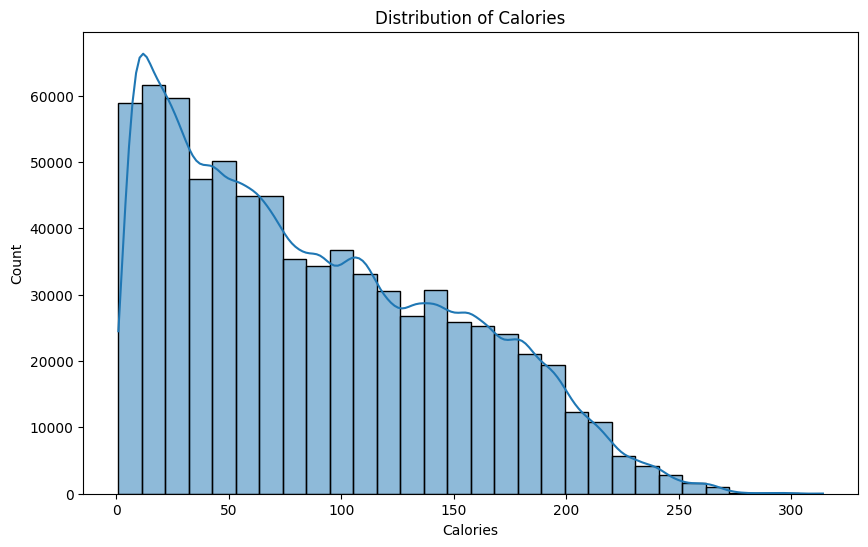

In [5]:
# Examine the target variable (Calories)
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories')
plt.show()



In [6]:
# Examine categorical variable (Sex)
print("\nGender distribution:")
print(df['Sex'].value_counts())


Gender distribution:
Sex
female    375721
male      374279
Name: count, dtype: int64


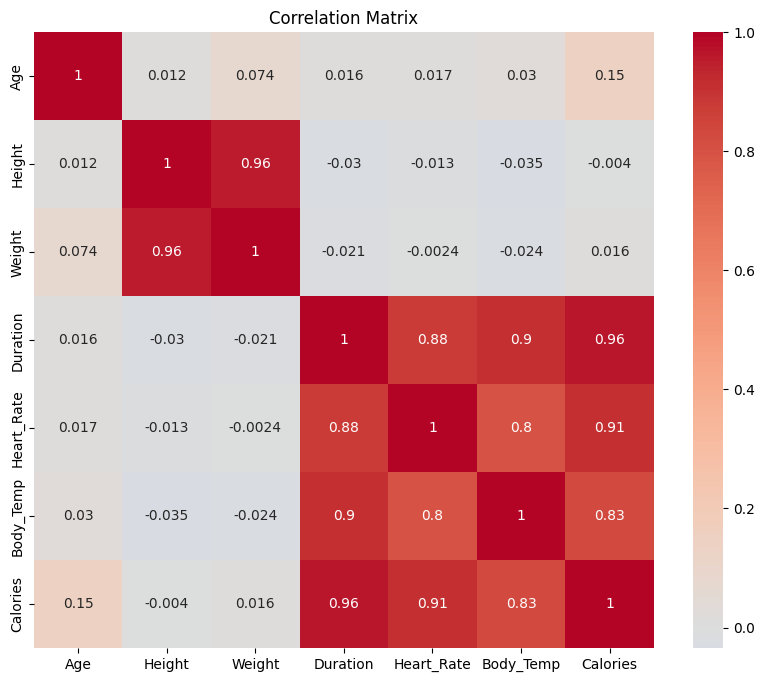

In [7]:
# Correlation matrix
numeric_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## STEP-3 : Data Visualisation

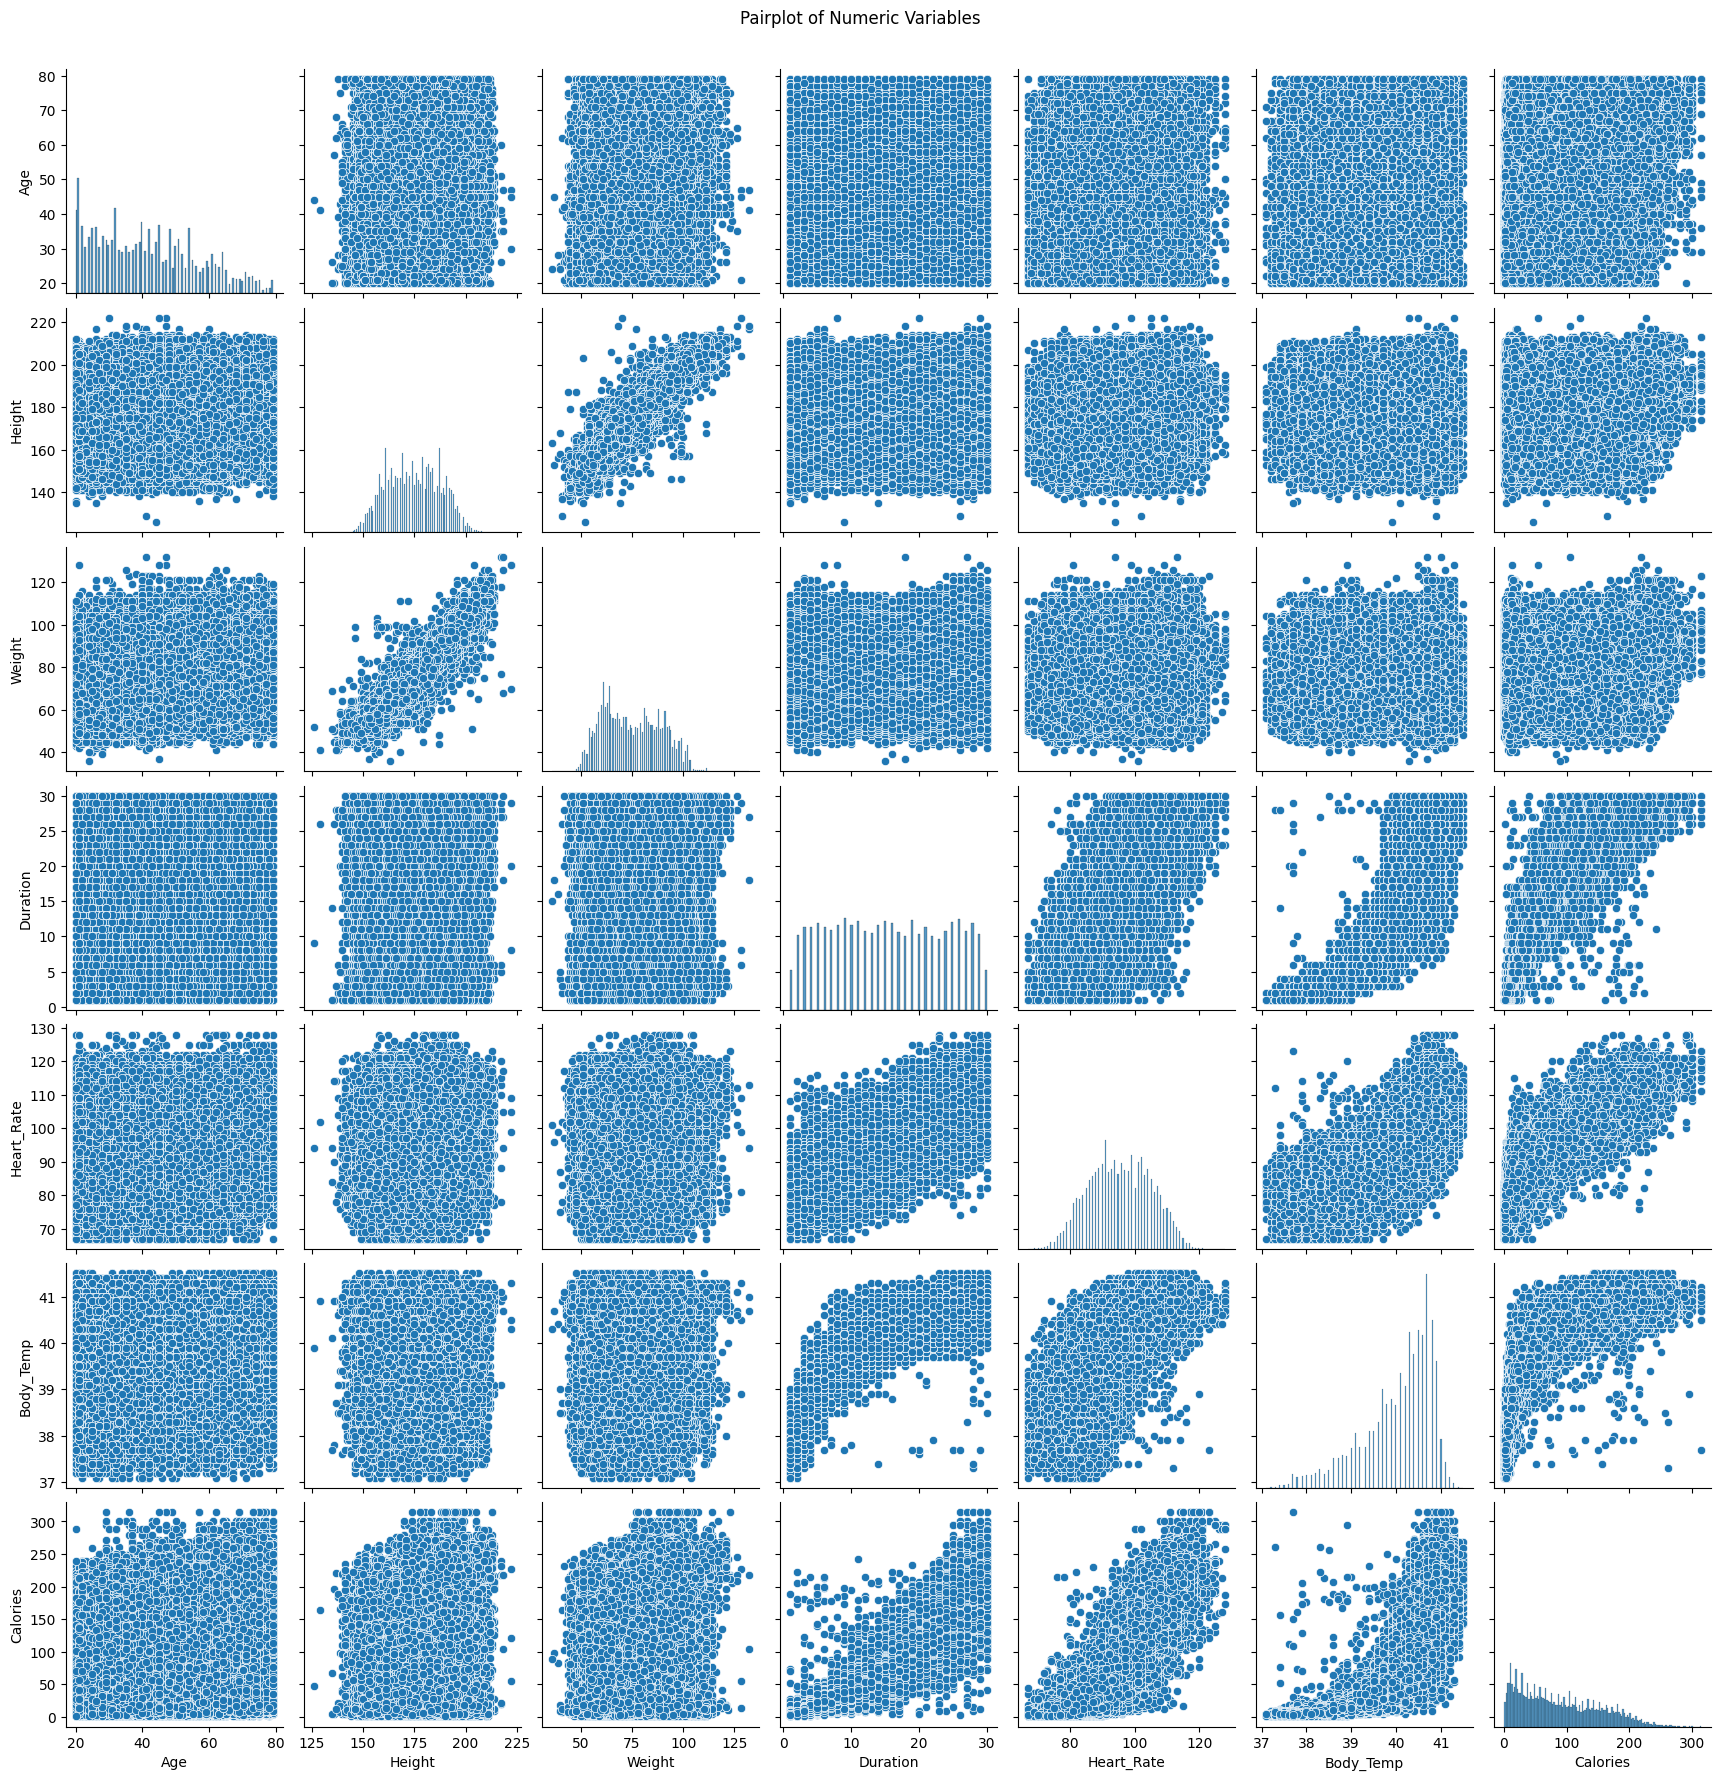

In [8]:
# Pairplot for numeric variables
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()



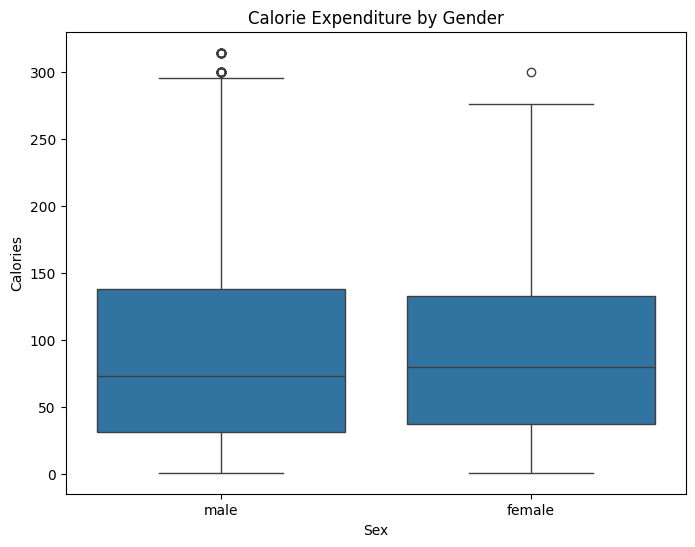

In [9]:
# Boxplot of Calories by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Calories', data=df)
plt.title('Calorie Expenditure by Gender')
plt.show()

In [ ]:
# Scatter plots of Calories vs key features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(x='Duration', y='Calories', hue='Sex', data=df, ax=axes[0, 0])
sns.scatterplot(x='Heart_Rate', y='Calories', hue='Sex', data=df, ax=axes[0, 1])
sns.scatterplot(x='Weight', y='Calories', hue='Sex', data=df, ax=axes[1, 0])
sns.scatterplot(x='Body_Temp', y='Calories', hue='Sex', data=df, ax=axes[1, 1])
plt.suptitle('Calories vs Key Features')
plt.tight_layout()
plt.show()

<ipython-input-10-0201d03f15e3>:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', kde=True, bins=30)
plt.title('Age Distribution by Gender')
plt.show()

## STEP-4 : Data Pre-Processing:

In [ ]:
# Separate features and target
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale

X = df.drop(['Calories', 'id'], axis=1)  # 'id' is just an identifier
y = df['Calories']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

print(f'\nBefore Label Encoding DF is as: \n{X_test.head()}')
print(f'\nBefore Label Encoding DF is as: \n{X_train.head()}')

# Iterate over column names
for column in X_train:
    if X_train[column].dtype.kind == 'O':
        X_train[column]= label_encoder.fit_transform(X_train[column])
        X_train[column]= label_encoder.fit_transform(X_train[column])

# Iterate over column names
for column in X_test:
    if X_test[column].dtype.kind == 'O':
        X_test[column]= label_encoder.fit_transform(X_test[column])
        X_test[column]= label_encoder.fit_transform(X_test[column])


print(f'\nAfter Label Encoding DF is as: \n{X_test.head()}')
print(f'\nAfter Label Encoding DF is as: \n{X_train.head()}')

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalised_x_train = minmax_scale(X_train, feature_range=(0,1))
normalised_x_test = minmax_scale(X_test, feature_range=(0,1))
normalised_y_train = minmax_scale(y_train, feature_range=(0,1))
normalised_y_test = minmax_scale(y_test, feature_range=(0,1))



## STEP-5 : Machine Learning Modelling:
### XGBOOST

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.preprocessing import minmax_scale
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_log_error, mean_squared_log_error
from math import sqrt


def objective(trial):
    param = {
        'objective': 'reg:squarederror',
        # 'tree_method': 'gpu_hist',
        # 'predictor': 'gpu_predictor',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth':    trial.suggest_int('max_depth', 3, 12),
        'learning_rate':trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'subsample':    trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha':    trial.suggest_float('reg_alpha', 1e-8, 10.0),
        'reg_lambda':   trial.suggest_float('reg_lambda', 1e-8, 10.0),
        'gamma':        trial.suggest_float('gamma', 0.0, 5.0)
    }
    model = XGBRegressor(**param, early_stopping_rounds=10, enable_categorical=True)

    model.fit(
        normalised_x_train, normalised_y_train,
        eval_set=[(normalised_x_test, normalised_y_test)],
        verbose=False
    )
    preds = model.predict(normalised_x_test)

    rmse = root_mean_squared_log_error(normalised_y_test, preds)
    # rmse = mean_squared_log_error(normalised_y_test, preds)
    # print(sqrt(mean_squared_log_error(normalised_y_test, preds)))

    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

In [ ]:
study.best_params

In [ ]:
model = XGBRegressor(
                        # tree_method= 'gpu_hist',
                        # predictor='gpu_predictor',
                        **study.best_params
                    )

model.fit(normalised_x_train, normalised_y_train)

y_train_pred = model.predict(normalised_x_train)
y_test_pred = model.predict(normalised_x_test)
train_rmsle = root_mean_squared_log_error(normalised_y_train, y_train_pred)
test_rmsle = root_mean_squared_log_error(normalised_y_test, y_test_pred)

print(f"\nTraining RMSLE: {train_rmsle:.4f}, Validation RMSLE: {test_rmsle:.4f}")

### Submission CSV Preparation:

In [ ]:
test_df = pd.read_csv(r'./Data Files/test.csv')
test_df.head()

In [ ]:
test_df.drop('id', inplace=True, axis=1)
test_df.head()

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

print(f'\nBefore Label Encoding DF is as: \n{test_df.head()}')

# Iterate over column names
for column in test_df:
    if test_df[column].dtype.kind == 'O':
        test_df[column]= label_encoder.fit_transform(test_df[column])
        test_df[column]= label_encoder.fit_transform(test_df[column])


print(f'\nAfter Label Encoding DF is as: \n{test_df.head()}')

In [ ]:
sample = pd.read_csv(r'./Data Files/sample_submission.csv')

preds = model.predict(scaler.transform(test_df))

sample['Calories'] = preds
sample.head(70)

In [ ]:
# import numpy as np

# sample_new = sample[sample >= 0].dropna()
# mean_val = sample_new['Calories'][sample_new['Calories'] >= 0].mean()
# sample_new['Calories'] = np.where(sample_new['Calories'] < 0, mean_val, sample_new['Calories'])
# # df_copy[col] = np.where(df_copy[col] < 0, mean_val, df_copy[col])

In [ ]:
sample = sample.mask(sample.lt(0)).fillna(sample['Calories'].mean()).convert_dtypes()
sample.head(69)

In [ ]:
sample.head(69)

In [ ]:
sample.to_csv(r'./Data Files/Output/Submission_File.csv', index=False)